In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import shutil

In [2]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 436s 2us/step


In [3]:
classes = ['daisy','dandelion','roses','sunflowers','tulips']

In [4]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8)) ## keeping 80 % of all data in train, and rest in validation
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

daisy: 633 Images
dandelion: 898 Images
roses: 641 Images
sunflowers: 699 Images
tulips: 799 Images


In [5]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [6]:
BATCH_SIZE = 100
IMAGE_SIZE = 150

In [7]:
image_gen = ImageDataGenerator(
                               rescale=1./255,
                               rotation_range=45,
                               zoom_range=50.0,
                               horizontal_flip=True,
                               width_shift_range=0.15,
                               height_shift_range=0.15
                              )
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                shuffle=True,
                                               directory=train_dir,
                                               class_mode='sparse',
                                               target_size=(IMAGE_SIZE,IMAGE_SIZE))

Found 2935 images belonging to 5 classes.


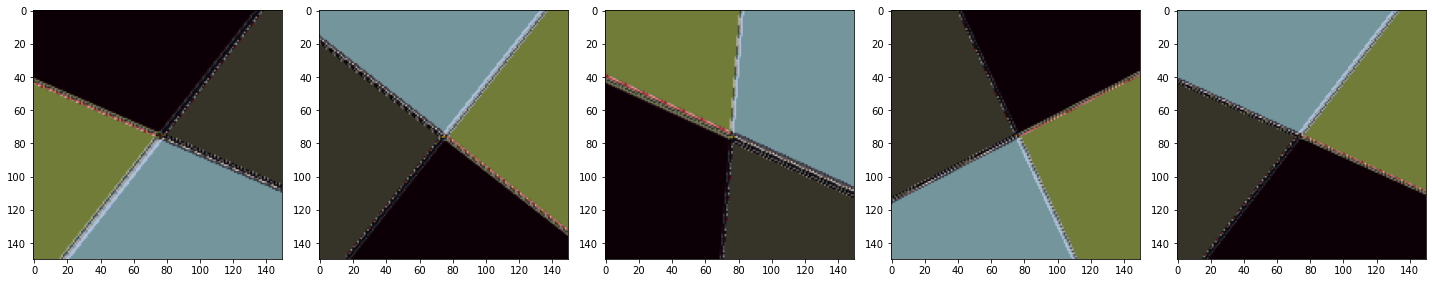

In [8]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [9]:
image_gen_val = ImageDataGenerator(rescale = 1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=val_dir,
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                class_mode='sparse')

Found 735 images belonging to 5 classes.


In [10]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5))

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
epochs = 80

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(BATCH_SIZE)))
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/80
30/30 [==============================] - 81s 3s/step - loss: 1.5612 - accuracy: 0.2777 - val_loss: 1.4294 - val_accuracy: 0.3252
Epoch 2/80
30/30 [==============================] - 32s 1s/step - loss: 1.4513 - accuracy: 0.3489 - val_loss: 1.3508 - val_accuracy: 0.4014
Epoch 3/80
30/30 [==============================] - 31s 1s/step - loss: 1.3916 - accuracy: 0.4048 - val_loss: 1.5303 - val_accuracy: 0.3891
Epoch 4/80
30/30 [==============================] - 30s 995ms/step - loss: 1.3467 - accuracy: 0.4259 - val_loss: 1.2765 - val_accuracy: 0.4748
Epoch 5/80
30/30 [==============================] - 29s 959ms/step - loss: 1.3178 - accuracy: 0.4388 - val_loss: 1.3368 - val_accuracy: 0.4245
Epoch 6/80
30/30 [==============================] - 29s 951ms/step - loss: 1.3012 - accuracy: 0.4545 - val_loss: 1.3535 - val_accuracy: 0.4408
Epoch 7/80
30/30 [==============================] - 27s 899ms/step - loss: 

Epoch 57/80
30/30 [==============================] - 34s 1s/step - loss: 0.9538 - accuracy: 0.6256 - val_loss: 1.1111 - val_accuracy: 0.5946
Epoch 58/80
30/30 [==============================] - 30s 1s/step - loss: 0.9387 - accuracy: 0.6303 - val_loss: 1.2196 - val_accuracy: 0.5673
Epoch 59/80
30/30 [==============================] - 33s 1s/step - loss: 0.9190 - accuracy: 0.6354 - val_loss: 1.2725 - val_accuracy: 0.5619
Epoch 60/80
30/30 [==============================] - 30s 991ms/step - loss: 0.9143 - accuracy: 0.6279 - val_loss: 1.1695 - val_accuracy: 0.5524
Epoch 61/80
30/30 [==============================] - 31s 1s/step - loss: 0.9194 - accuracy: 0.6351 - val_loss: 1.2075 - val_accuracy: 0.5646
Epoch 62/80
30/30 [==============================] - 32s 1s/step - loss: 0.9175 - accuracy: 0.6300 - val_loss: 1.2520 - val_accuracy: 0.5673
Epoch 63/80
30/30 [==============================] - 32s 1s/step - loss: 0.9214 - accuracy: 0.6221 - val_loss: 1.3170 - val_accuracy: 0.5483
Epoch 64/8

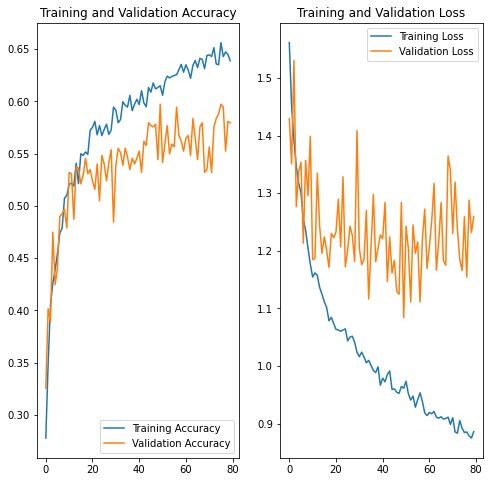

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()